## 4.2 Sentiment analysis

### 4.2.1 Results for Twitter Data

After looking at the polarities of the two dictionary approaches we decided to take the polarity scores generated from the TextBlob library as they seem to be more meaningful for the further analysis. Here it should be noted that all dictionary based approaches are limited in their capacity to clearly identify sentiment in each and every case but we will look further into this in the validation part. <br>
It should be noted that there exist other approaches to sentiment analysis in automated media content analysis. For example there are BERT models build for sentiment analysis of german texts. We decided against them in this scientific work because the implementation is rather resource heavy and the results are not necessarily better. In further work one could very well try out more approaches in that direction. Also the posibility of machine-learning approaches would be attainable if the data was to be labeled by human coders but as we have over 100000 tweets in our corpus this approach would take too much time. We therefore will use gold standard validation later on to see how well the dictionaries perform in comparison to human coders. 

In [1]:
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import pandas as pd
from textblob_de import TextBlobDE as TextBlob
import numpy as np
from tqdm.notebook import tqdm

import re
import pickle
pd.options.mode.chained_assignment = None  # default='warn' based on false positives

tqdm.pandas()

In [2]:
#import the data 
sentiment_tweets=pd.read_csv("../data/processed/sentiment_scores_twitter_01.csv")[0:100]
pre_data_twitter= pickle.load(open('../data/processed/tweets_processed.p','rb'))[0:100]

#### 4.2.1.1 Analysis of Political Parties

In [3]:
#compute the mean for Polarity and sum over number of tweets from the six parties represented
CDU_polarity = np.mean(sentiment_tweets['Polarity_mean'][0:7])
print('CDU Sentiment: ',CDU_polarity)
FDP_polarity = np.mean(sentiment_tweets['Polarity_mean'][7:14])
print('FDP Sentiment: ',FDP_polarity)
SPD_polarity = np.mean(sentiment_tweets['Polarity_mean'][14:21])
print('SPD Sentiment: ',SPD_polarity)
GRUENE_polarity = np.mean(sentiment_tweets['Polarity_mean'][21:28])
print('GRUENE Sentiment: ',GRUENE_polarity)
LINKE_polarity = np.mean(sentiment_tweets['Polarity_mean'][28:35])
print('LINKE Sentiment: ',LINKE_polarity)
AFD_polarity = np.mean(sentiment_tweets['Polarity_mean'][35:42])
print('AFD Sentiment: ',AFD_polarity)
print( )

for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    CDU_cat = np.sum(sentiment_tweets[category][0:7])
    print('CDU ',category,': ',CDU_cat)
    FDP_cat = np.sum(sentiment_tweets[category][7:14])
    print('FDP ',category,': ',FDP_cat)
    SPD_cat = np.sum(sentiment_tweets[category][14:21])
    print('SPD ',category,': ',SPD_cat)
    GRUENE_cat = np.sum(sentiment_tweets[category][21:28])
    print('GRUENE ',category,': ',GRUENE_cat)
    LINKE_cat = np.sum(sentiment_tweets[category][28:35])
    print('LINKE ',category,': ',LINKE_cat)
    AFD_cat = np.sum(sentiment_tweets[category][35:42])
    print('AFD ',category,': ',AFD_cat)
    print( )

CDU Sentiment:  0.2650833333333333
FDP Sentiment:  nan
SPD Sentiment:  nan
GRUENE Sentiment:  nan
LINKE Sentiment:  nan
AFD Sentiment:  nan

CDU  Num_pos_tweets :  42
FDP  Num_pos_tweets :  0
SPD  Num_pos_tweets :  0
GRUENE  Num_pos_tweets :  0
LINKE  Num_pos_tweets :  0
AFD  Num_pos_tweets :  0

CDU  Num_neutral_tweets :  48
FDP  Num_neutral_tweets :  0
SPD  Num_neutral_tweets :  0
GRUENE  Num_neutral_tweets :  0
LINKE  Num_neutral_tweets :  0
AFD  Num_neutral_tweets :  0

CDU  Num_neg_tweets :  10
FDP  Num_neg_tweets :  0
SPD  Num_neg_tweets :  0
GRUENE  Num_neg_tweets :  0
LINKE  Num_neg_tweets :  0
AFD  Num_neg_tweets :  0



#### 4.2.1.2 Analysis of Gender Differences

In [4]:
#compute the mean for Polarity and sum over number of tweets for male and female politicians
female_polarity= np.mean(sentiment_tweets.loc[sentiment_tweets['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Female Sentiment:',female_polarity)
for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    female_cat = np.sum(sentiment_tweets.loc[sentiment_tweets['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Female ',category,': ',female_cat)

male_polarity= np.mean(sentiment_tweets.loc[~sentiment_tweets['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Male Sentiment:',male_polarity)
for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    male_cat = np.sum(sentiment_tweets.loc[~sentiment_tweets['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Male ',category,': ',male_cat)

Female Sentiment: nan
Female  Num_pos_tweets :  0
Female  Num_neutral_tweets :  0
Female  Num_neg_tweets :  0
Male Sentiment: 0.2650833333333333
Male  Num_pos_tweets :  42
Male  Num_neutral_tweets :  48
Male  Num_neg_tweets :  10


#### 4.2.1.3 Analysis of Politicians over Time

  0%|          | 0/42 [00:00<?, ?it/s]

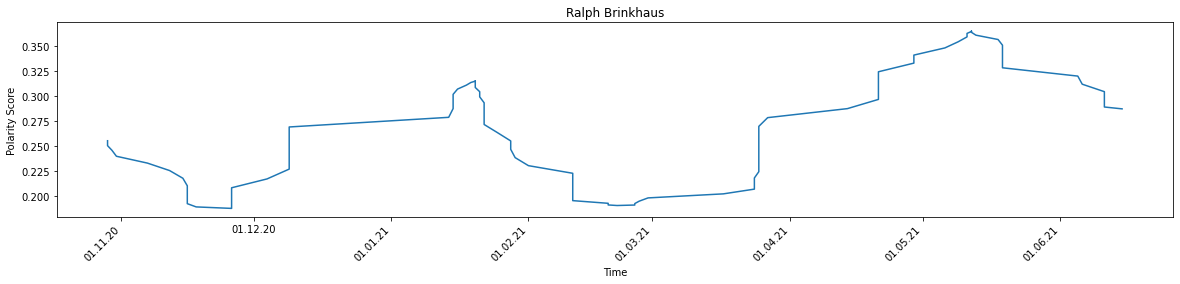

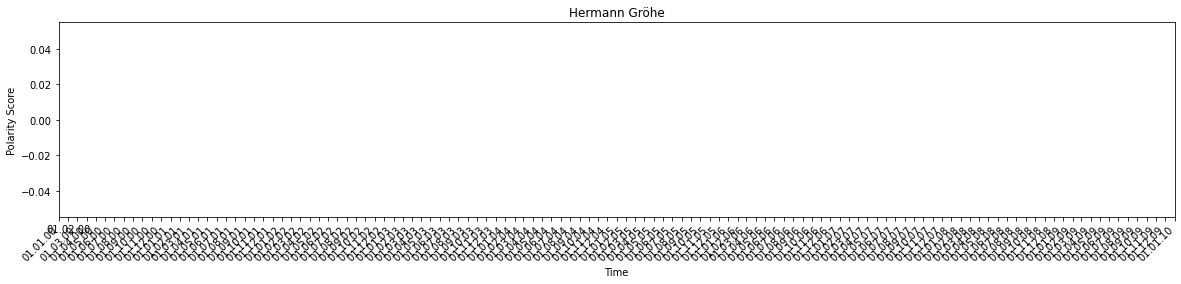

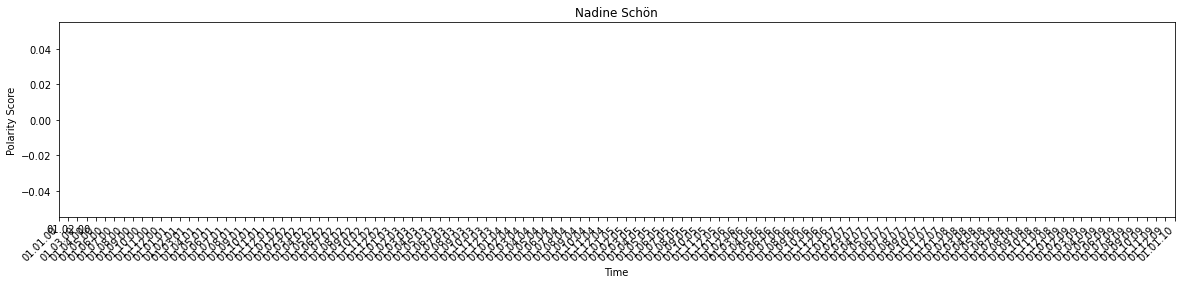

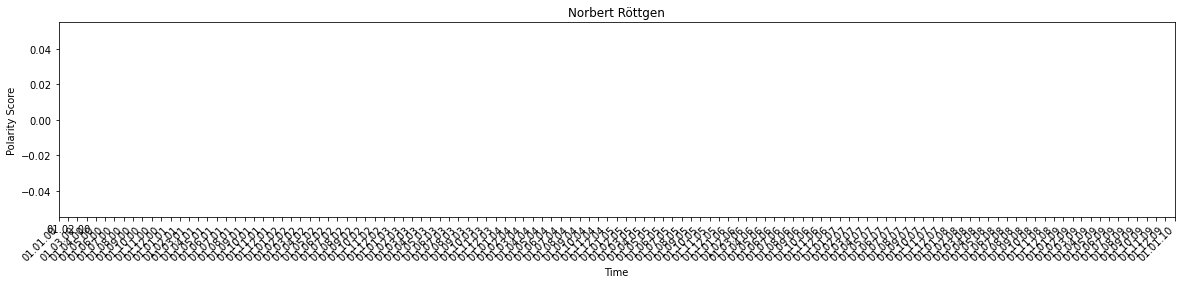

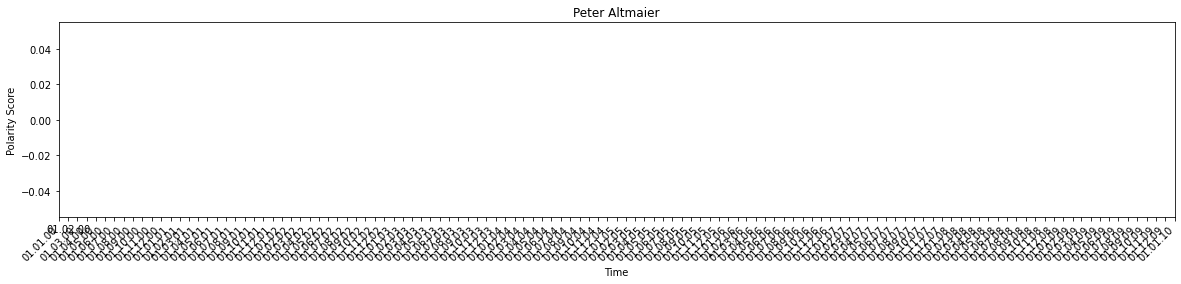

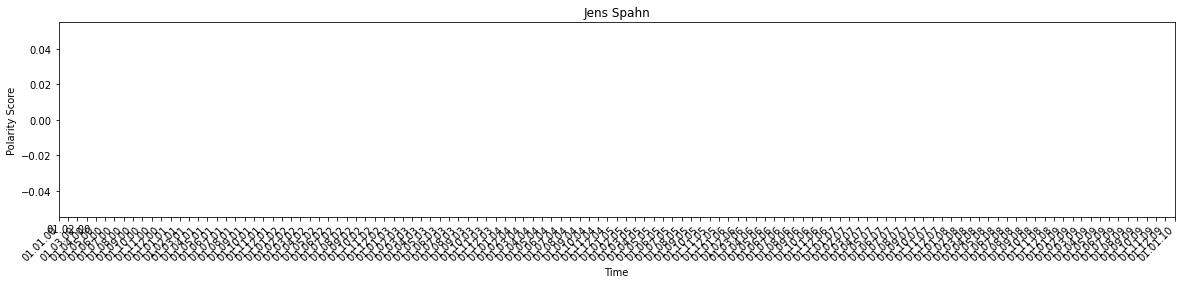

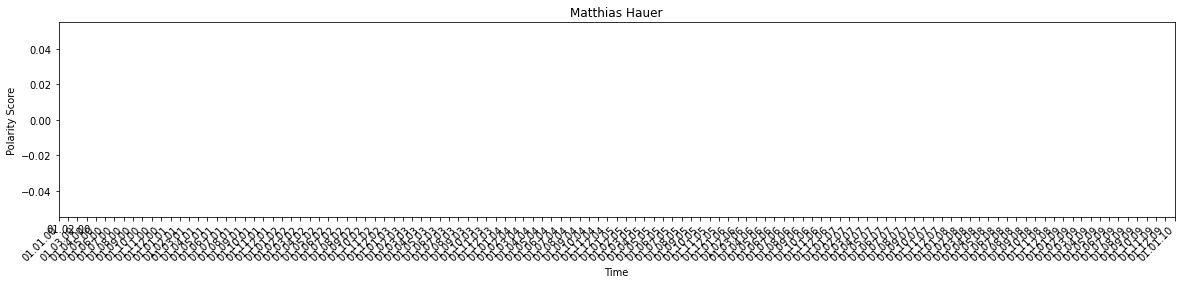

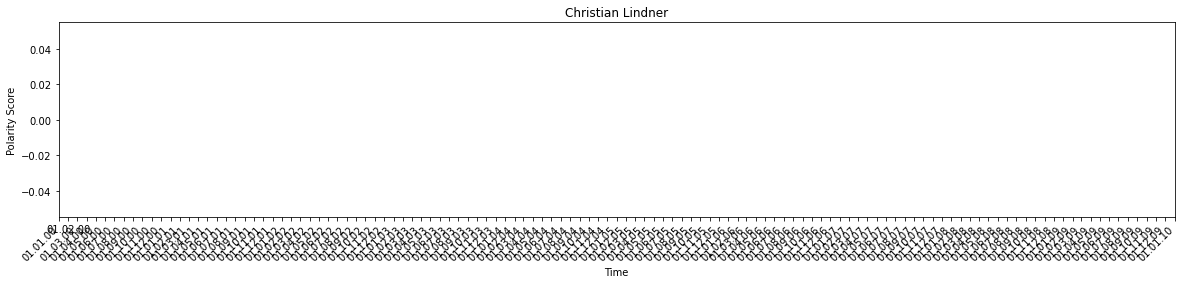

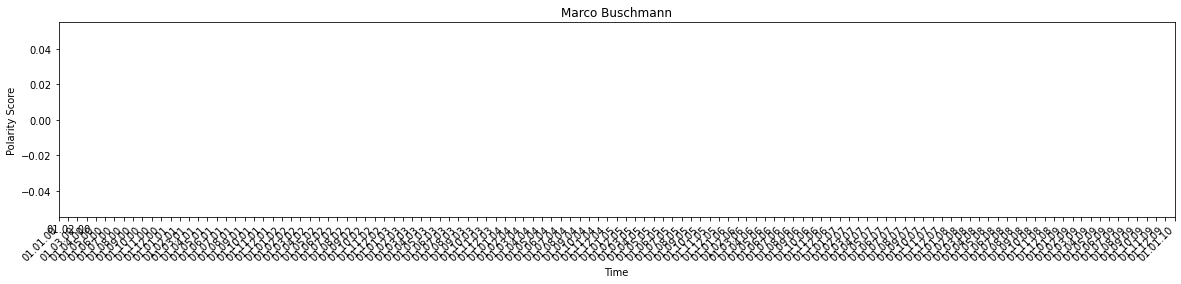

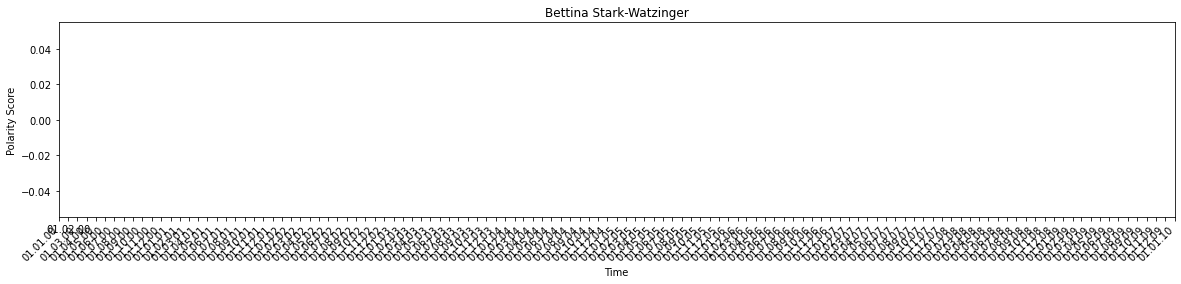

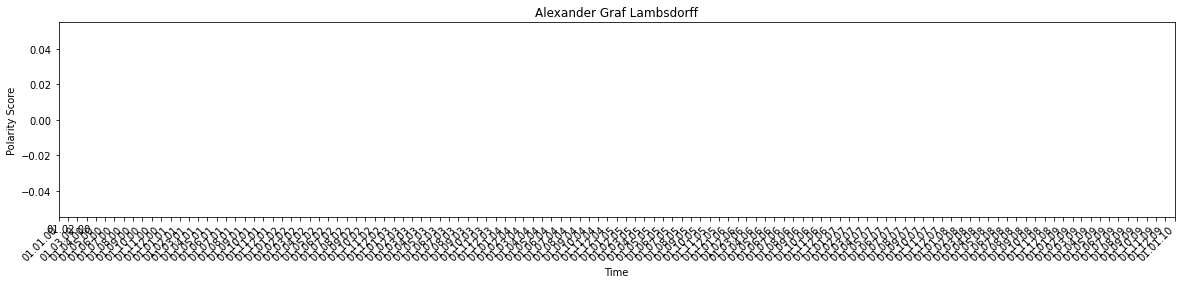

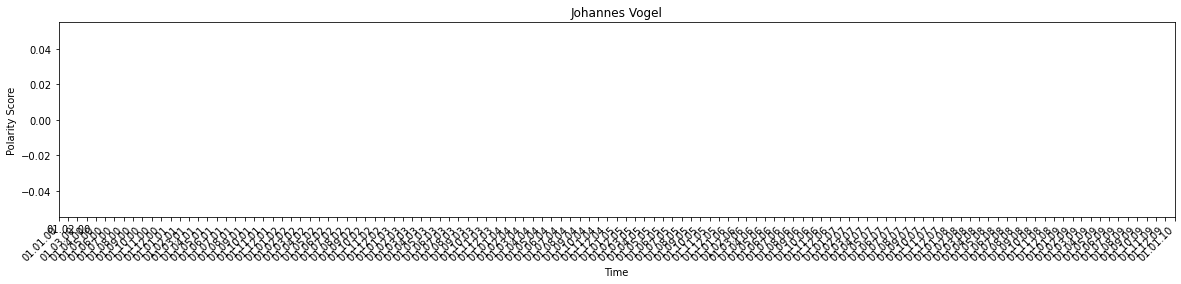

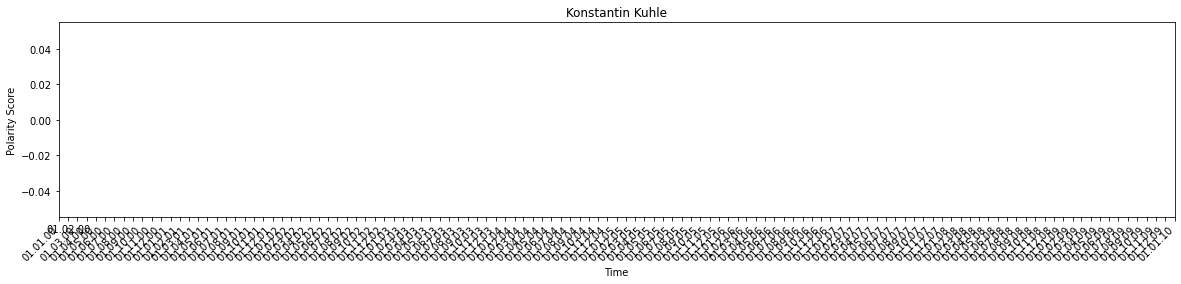

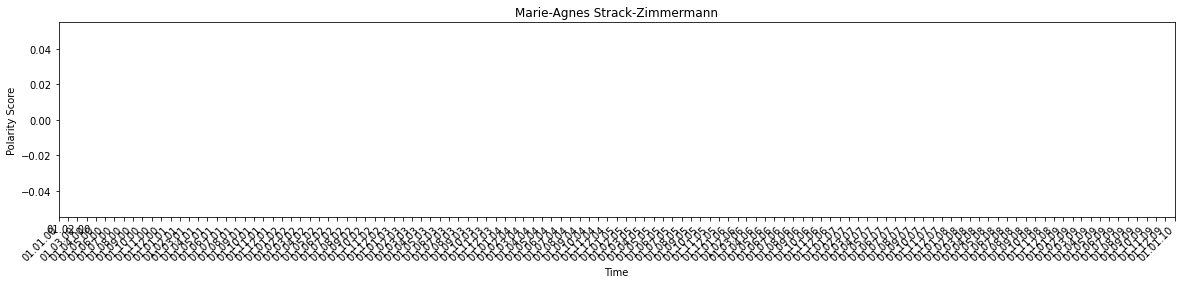

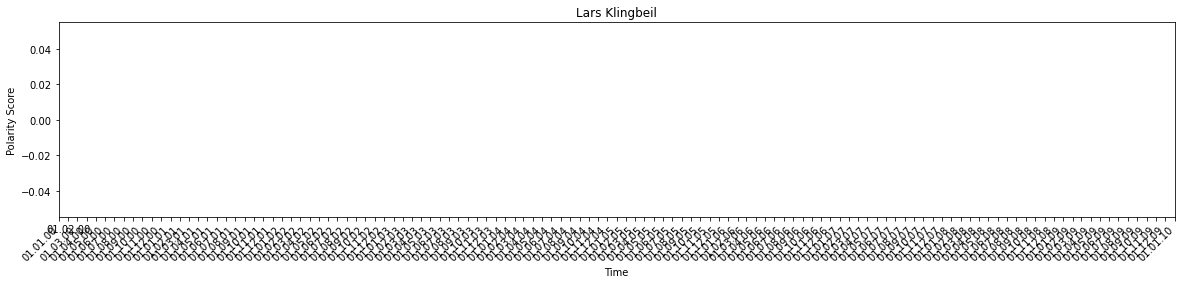

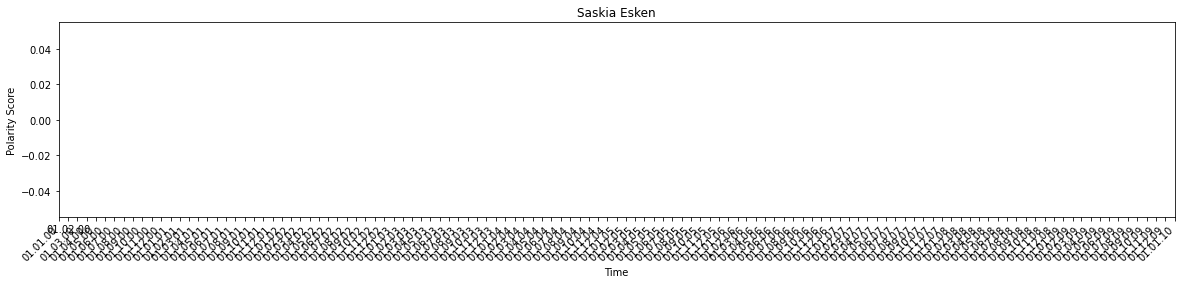

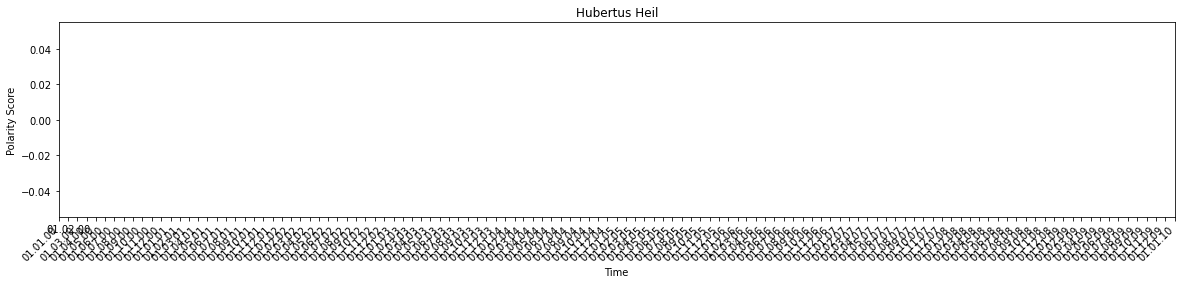

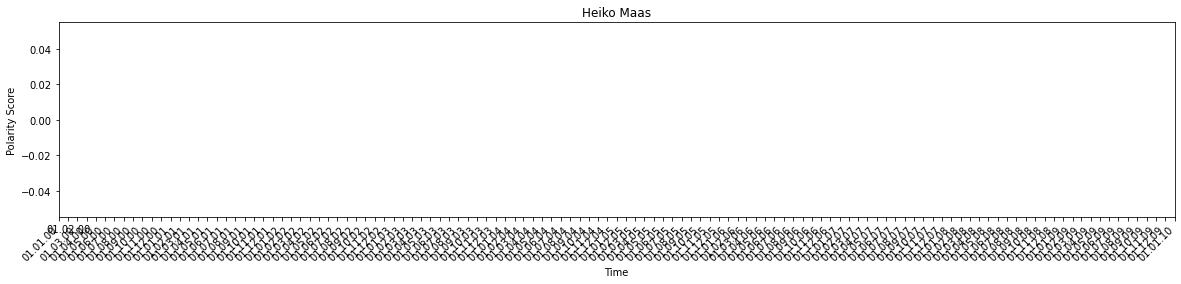

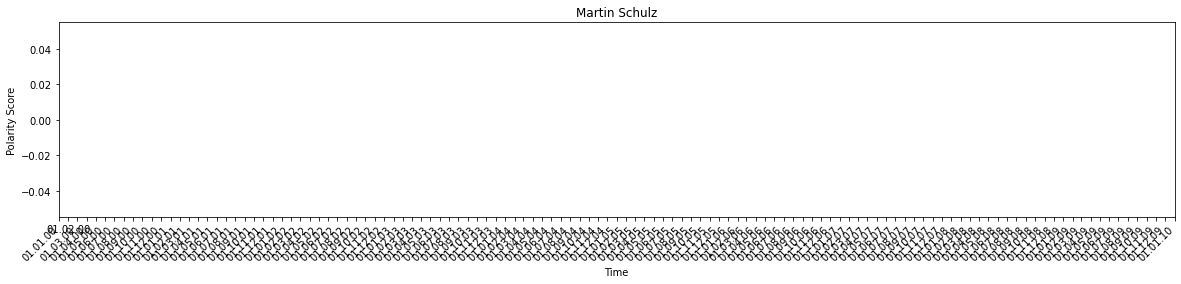

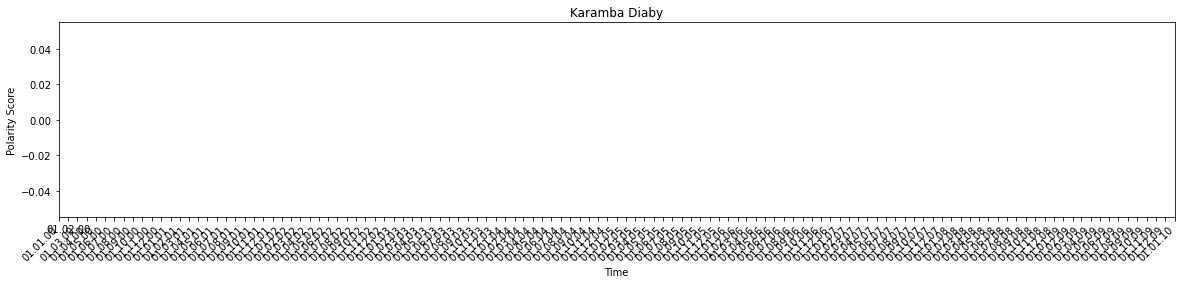

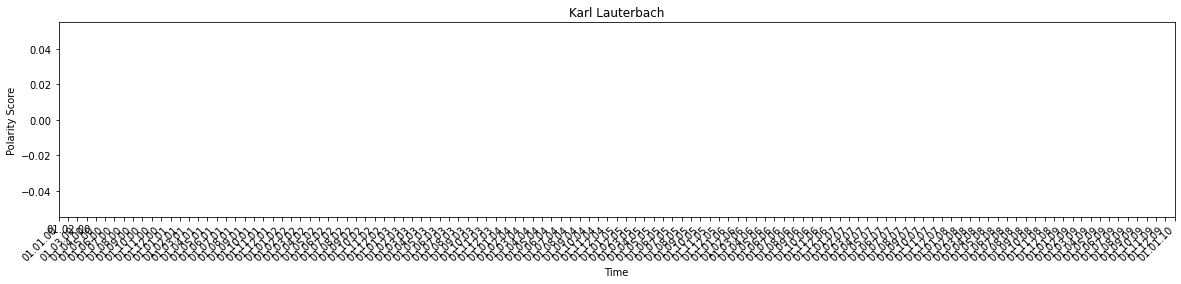

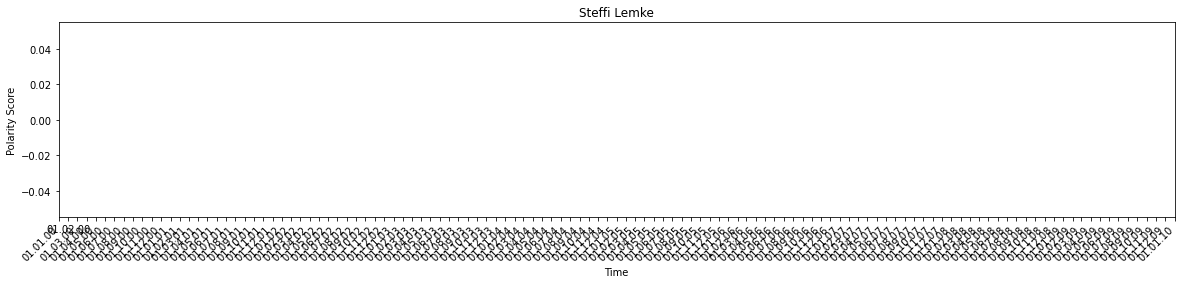

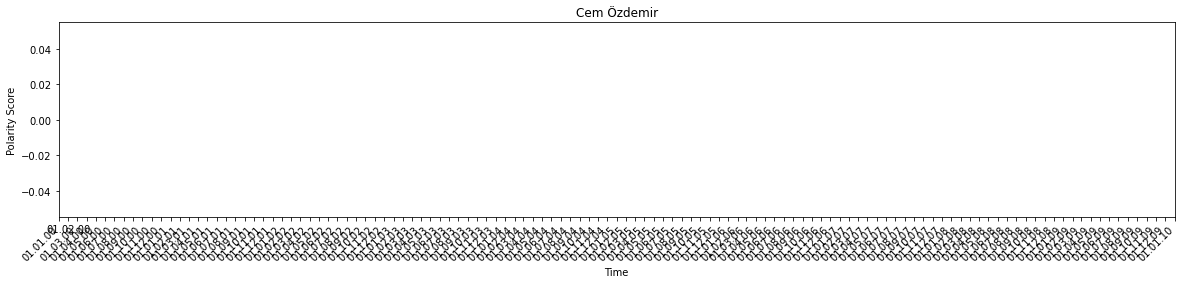

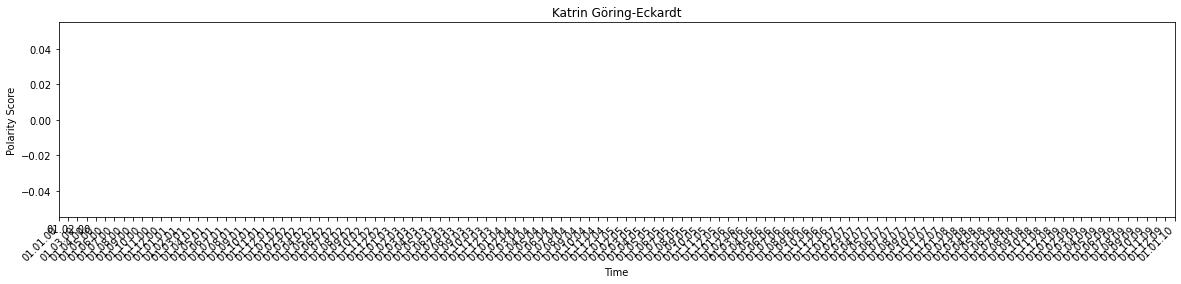

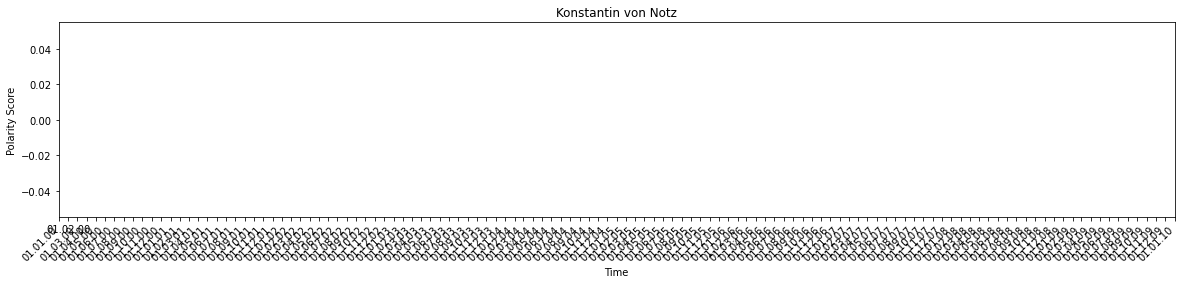

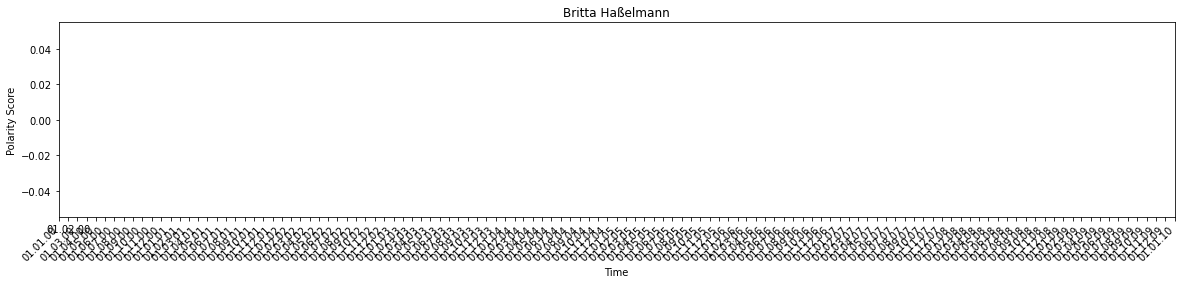

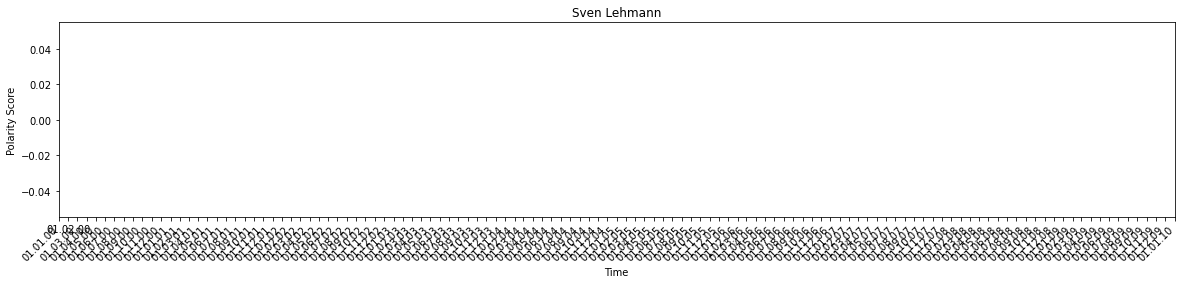

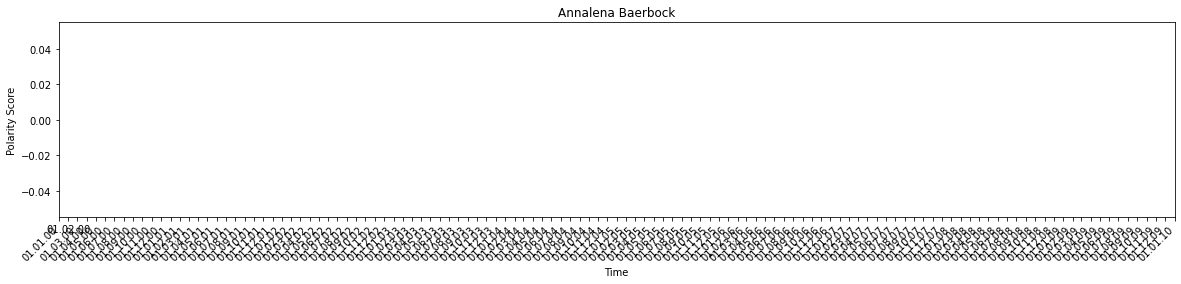

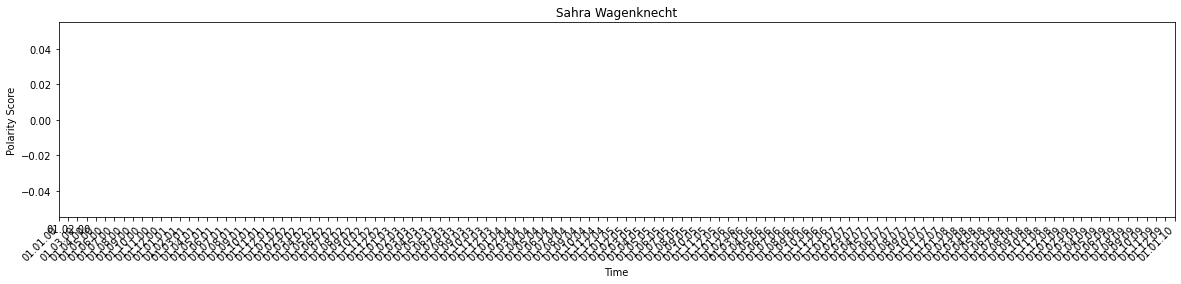

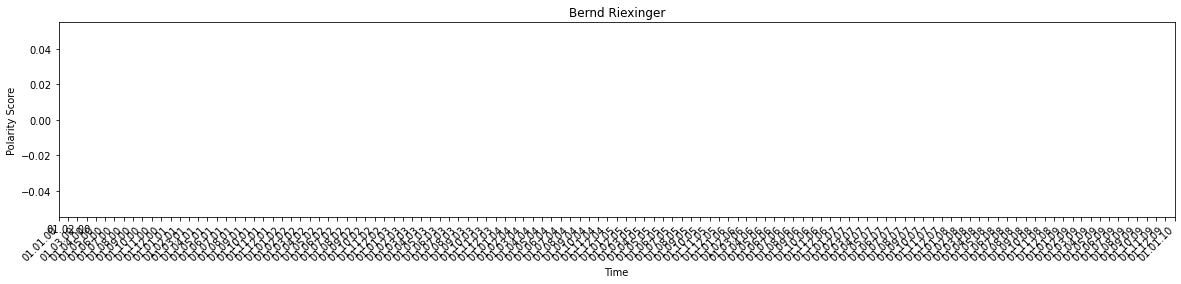

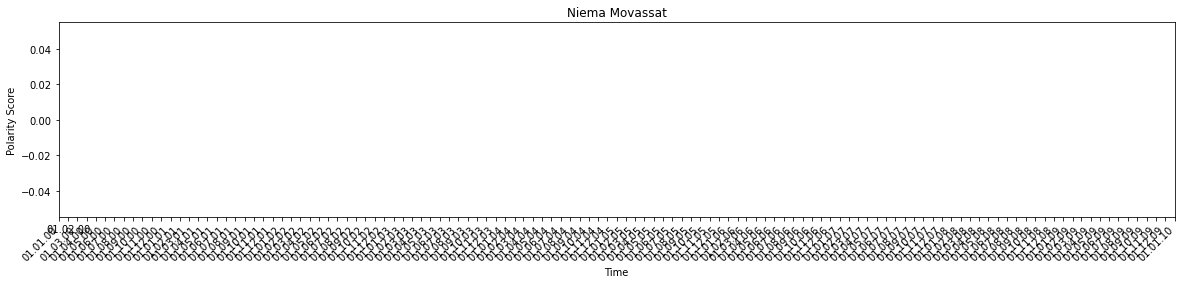

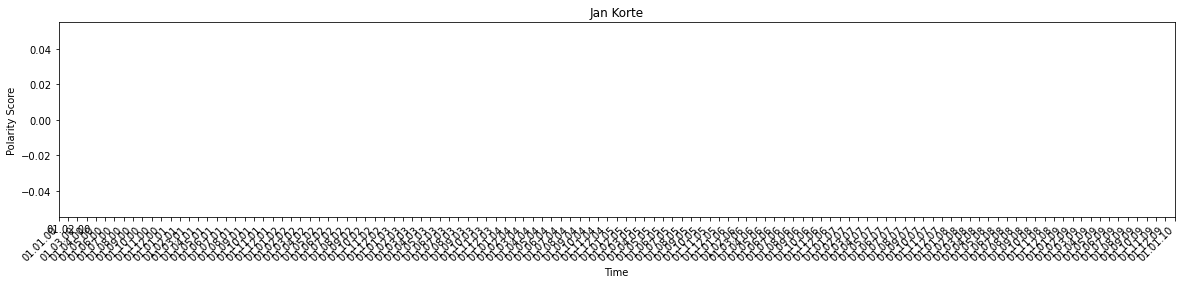

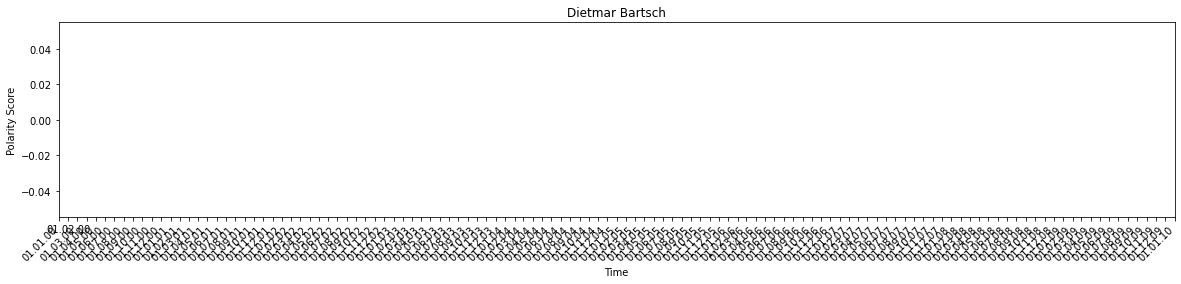

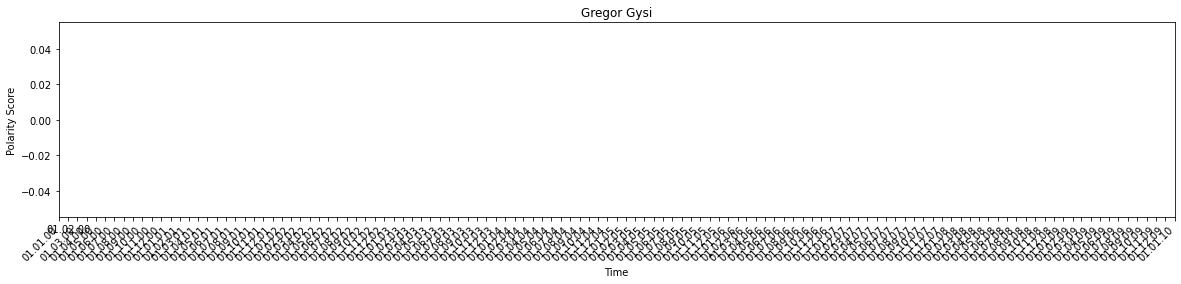

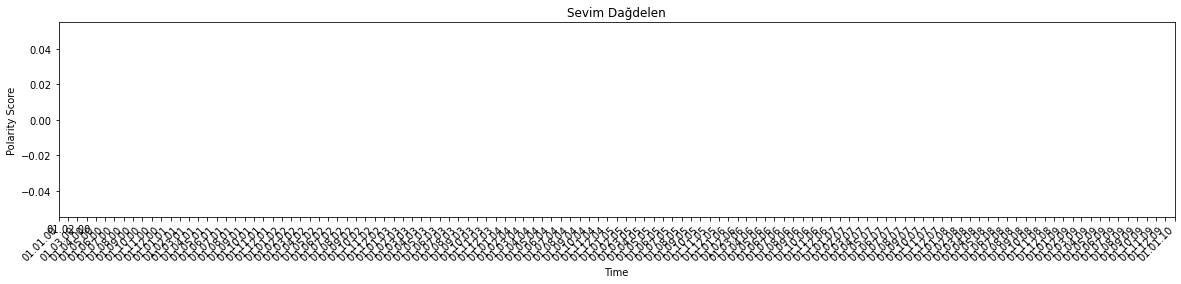

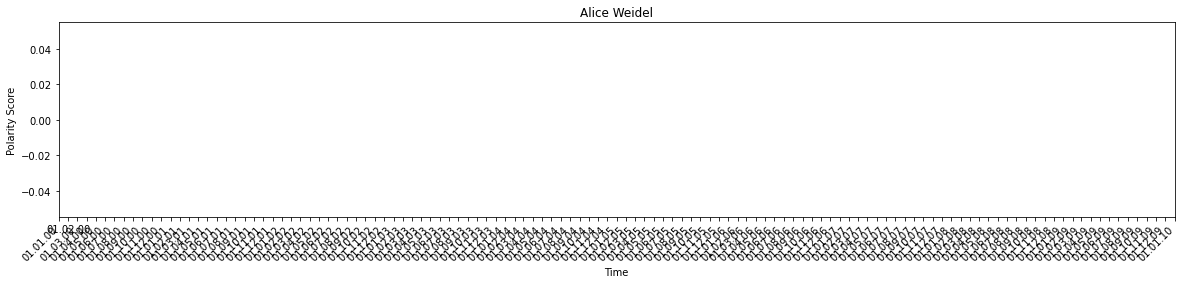

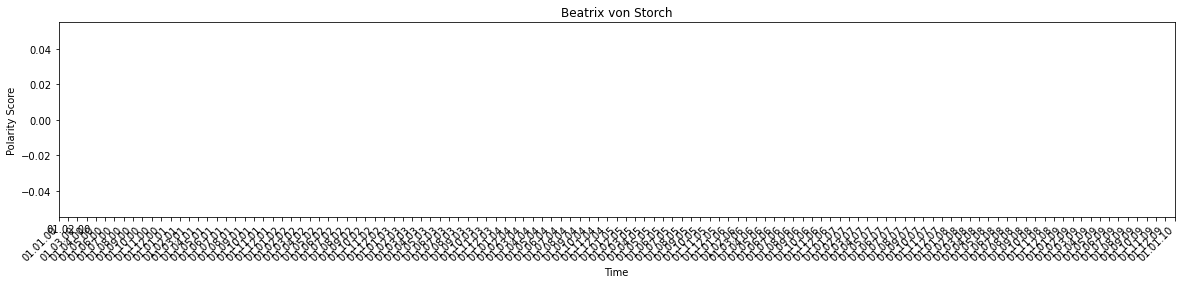

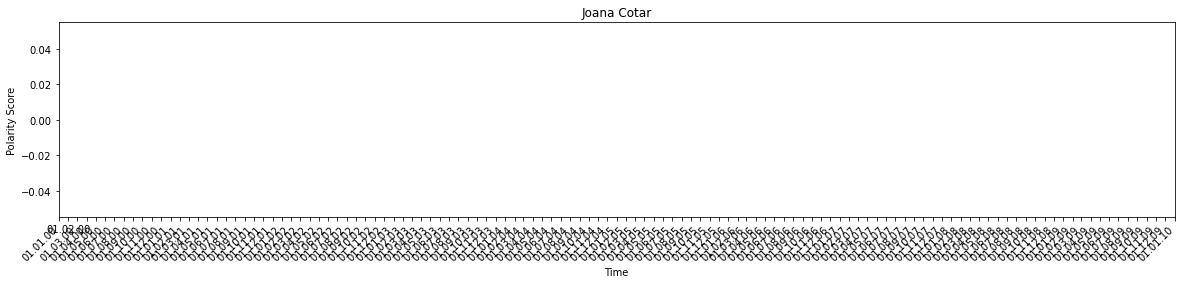

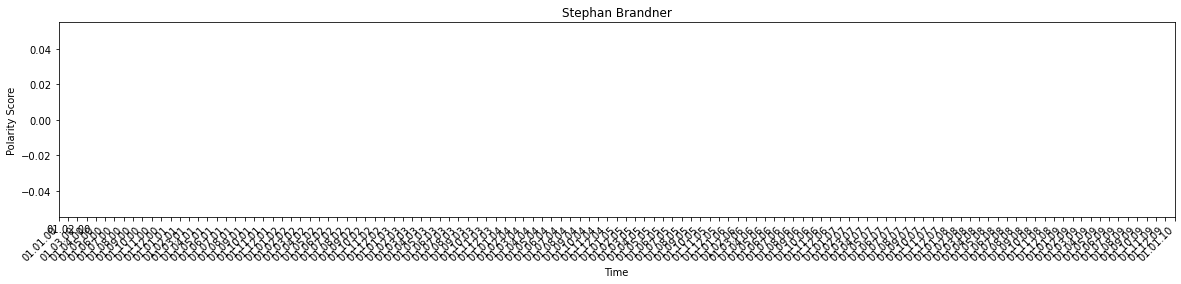

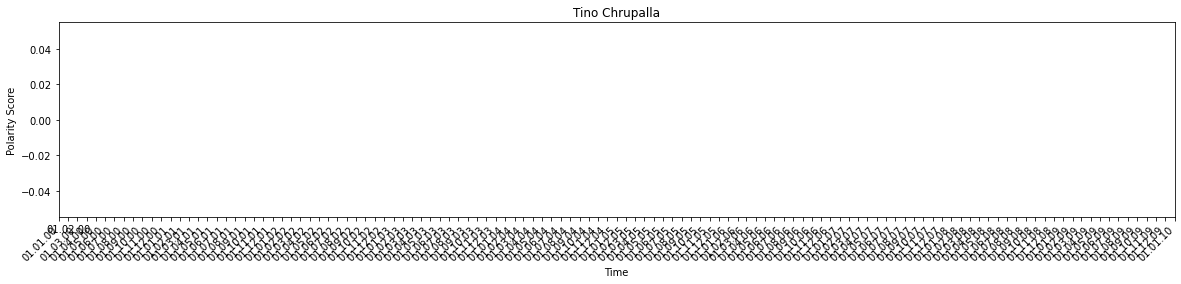

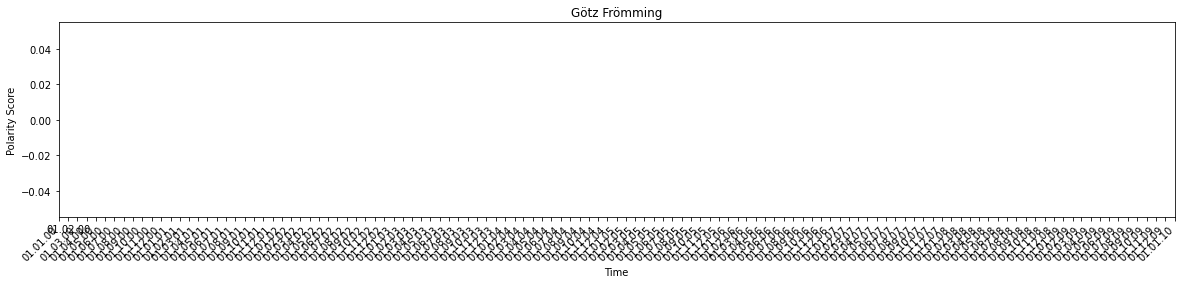

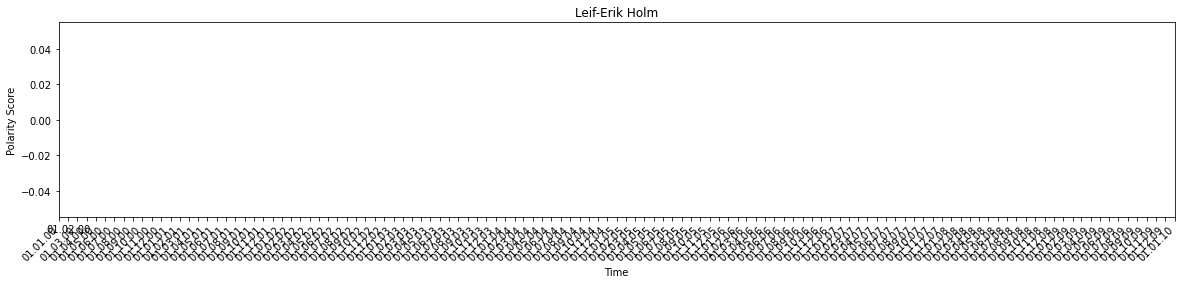

In [5]:
#plot the polarity of tweets over time
i=1
for name in tqdm(['Ralph Brinkhaus','Hermann Gröhe', 'Nadine Schön' ,'Norbert Röttgen' , 'Peter Altmaier' , 'Jens Spahn' , 'Matthias Hauer',
            'Christian Lindner' , 'Marco Buschmann' , 'Bettina Stark-Watzinger', 'Alexander Graf Lambsdorff' , 'Johannes Vogel' , 'Konstantin Kuhle' , 'Marie-Agnes Strack-Zimmermann',
            'Lars Klingbeil' , 'Saskia Esken' , 'Hubertus Heil' , 'Heiko Maas' , 'Martin Schulz' , 'Karamba Diaby' , 'Karl Lauterbach',
            'Steffi Lemke' , 'Cem Özdemir' , 'Katrin Göring-Eckardt' , 'Konstantin von Notz' , 'Britta Haßelmann' , 'Sven Lehmann' , 'Annalena Baerbock',
            'Sahra Wagenknecht' , 'Bernd Riexinger' , 'Niema Movassat' , 'Jan Korte' , 'Dietmar Bartsch' , 'Gregor Gysi' , 'Sevim Dağdelen',
            'Alice Weidel' , 'Beatrix von Storch' , 'Joana Cotar' , 'Stephan Brandner' , 'Tino Chrupalla' , 'Götz Frömming' , 'Leif-Erik Holm']):
    #get tweets from the specific politician
    tweets_analyzing =pre_data_twitter.loc[pre_data_twitter['full_name']==name]
    #create sentiment scores
    blobs=tweets_analyzing['text_preprocessed_sentence'].apply(TextBlob)
    sentiment=[]
    for blob in blobs:
        sentiment.append(blob.sentiment)
    #get the scores
    polarity=[]
    for egg in sentiment:
        polarity.append(egg.polarity)
    #get the desired dates and convert timestamp
    tweets_analyzing['polarity']=polarity
    tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])

    dates=tweets_analyzing['date']
    values=tweets_analyzing['polarity']

    #smooth the curve, higher sigma means more smoothing
    if len(polarity)>18999:
        s=100
    elif len(polarity)>17999:
        s=95
    elif len(polarity)>16999:
        s=90
    elif len(polarity)>15999:
        s=85
    elif len(polarity)>14999:
        s=80
    elif len(polarity)>13999:
        s=75
    elif len(polarity)>12999:
        s=70
    elif len(polarity)>11999:
        s=65
    elif len(polarity)>10999:
        s=60
    elif len(polarity)>9999:
        s=55
    elif len(polarity)>8999:
        s=50
    elif len(polarity)>7999:
        s=45
    elif len(polarity)>6999:
        s=40
    elif len(polarity)>5999:
        s=35
    elif len(polarity)>4999:
        s=30
    elif len(polarity)>3999:
        s=25
    elif len(polarity)>2999:
        s=20
    elif len(polarity)>1999:
        s=15
    elif len(polarity)>1399:
        s=10
    else:
        s=8
    ysmoothed = gaussian_filter1d(values, sigma=s)

    fig = plt.figure(figsize=(20,200))
    ax = fig.add_subplot(42,1,i)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))    
    fig.autofmt_xdate(rotation=45)
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Polarity Score')
    plt.plot(dates, ysmoothed)
    plt.show()
    i +=1

#### 4.2.1.4 Like Sentiment Correlation

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [7]:
#create a polarity column for our dataset
blobs=pre_data_twitter['text_preprocessed_sentence'].progress_apply(TextBlob)
sentiment=[]
for blob in blobs:
    sentiment.append(blob.sentiment)
#get the scores
polarity=[]
for egg in sentiment:
    polarity.append(egg.polarity)
pre_data_twitter['polarity_textblob'] = polarity

  0%|          | 0/100 [00:00<?, ?it/s]

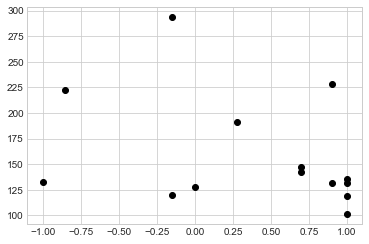

In [8]:
pre_data_twitter_more_likes= pre_data_twitter.loc[pre_data_twitter['like_count']>=100]
plt.plot(pre_data_twitter_more_likes['polarity_textblob'], pre_data_twitter_more_likes['like_count'], 'o', color='black')

### 4.2.2 Results for Bundestag Speeches

In [9]:
#import data
sentiment_speeches=pd.read_csv("../data/processed/sentiment_scores_speeches_01.csv")[0:100]
pre_data_speeches= pickle.load(open('../data/processed/speeches_processed.p','rb'))[0:100]

#### 4.2.2.1 Analysis of Political Parties

In [10]:
#compute the mean for Polarity and sum over number of speeches from the six parties represented
CDU_polarity = np.mean(sentiment_speeches['Polarity_mean'][0:7])
print('CDU Sentiment: ',CDU_polarity)
FDP_polarity = np.mean(sentiment_speeches['Polarity_mean'][7:14])
print('FDP Sentiment: ',FDP_polarity)
SPD_polarity = np.mean(sentiment_speeches['Polarity_mean'][14:21])
print('SPD Sentiment: ',SPD_polarity)
GRUENE_polarity = np.mean(sentiment_speeches['Polarity_mean'][21:28])
print('GRUENE Sentiment: ',GRUENE_polarity)
LINKE_polarity = np.mean(sentiment_speeches['Polarity_mean'][28:35])
print('LINKE Sentiment: ',LINKE_polarity)
AFD_polarity = np.mean(sentiment_speeches['Polarity_mean'][35:42])
print('AFD Sentiment: ',AFD_polarity)
print( )

for category in ['Num_pos_speeches','Num_neutral_speeches','Num_neg_speeches']:
    CDU_cat = np.sum(sentiment_speeches[category][0:7])
    print('CDU ',category,': ',CDU_cat)
    FDP_cat = np.sum(sentiment_speeches[category][7:14])
    print('FDP ',category,': ',FDP_cat)
    SPD_cat = np.sum(sentiment_speeches[category][14:21])
    print('SPD ',category,': ',SPD_cat)
    GRUENE_cat = np.sum(sentiment_speeches[category][21:28])
    print('GRUENE ',category,': ',GRUENE_cat)
    LINKE_cat = np.sum(sentiment_speeches[category][28:35])
    print('LINKE ',category,': ',LINKE_cat)
    AFD_cat = np.sum(sentiment_speeches[category][35:42])
    print('AFD ',category,': ',AFD_cat)
    print( )

CDU Sentiment:  0.2908198209718669
FDP Sentiment:  0.18875784725512143
SPD Sentiment:  0.12261904761904761
GRUENE Sentiment:  0.33798139287612966
LINKE Sentiment:  0.2397692512865386
AFD Sentiment:  0.2647033400168575

CDU  Num_pos_speeches :  6
FDP  Num_pos_speeches :  21
SPD  Num_pos_speeches :  6
GRUENE  Num_pos_speeches :  12
LINKE  Num_pos_speeches :  12
AFD  Num_pos_speeches :  13

CDU  Num_neutral_speeches :  2
FDP  Num_neutral_speeches :  0
SPD  Num_neutral_speeches :  1
GRUENE  Num_neutral_speeches :  1
LINKE  Num_neutral_speeches :  2
AFD  Num_neutral_speeches :  3

CDU  Num_neg_speeches :  3
FDP  Num_neg_speeches :  2
SPD  Num_neg_speeches :  4
GRUENE  Num_neg_speeches :  4
LINKE  Num_neg_speeches :  4
AFD  Num_neg_speeches :  4



#### 4.2.2.2 Analysis of Gender Differences

In [11]:
#compute the mean for Polarity and sum over number of speeches for male and female politicians
female_polarity= np.mean(sentiment_speeches.loc[sentiment_speeches['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Female Sentiment:',female_polarity)
for category in ['Num_pos_speeches','Num_neutral_speeches','Num_neg_speeches']:
    female_cat = np.sum(sentiment_speeches.loc[sentiment_speeches['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Female ',category,': ',female_cat)

male_polarity= np.mean(sentiment_speeches.loc[~sentiment_speeches['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Male Sentiment:',male_polarity)
for category in ['Num_pos_speeches','Num_neutral_speeches','Num_neg_speeches']:
    male_cat = np.sum(sentiment_speeches.loc[~sentiment_speeches['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Male ',category,': ',male_cat)

Female Sentiment: 0.055587835029635886
Female  Num_pos_speeches :  25
Female  Num_neutral_speeches :  4
Female  Num_neg_speeches :  10
Male Sentiment: 0.3117638426273199
Male  Num_pos_speeches :  45
Male  Num_neutral_speeches :  5
Male  Num_neg_speeches :  11


#### 4.2.2.3 Analysis of Politicians over Time

  0%|          | 0/42 [00:00<?, ?it/s]

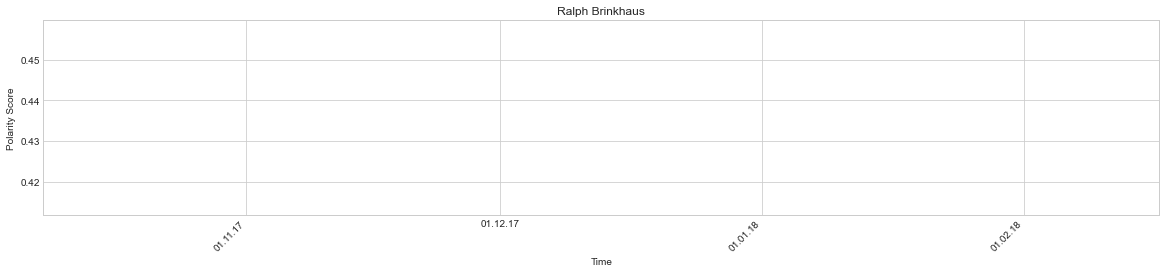

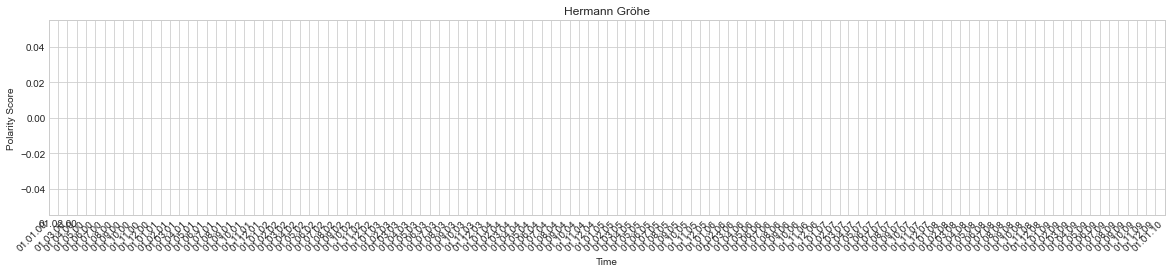

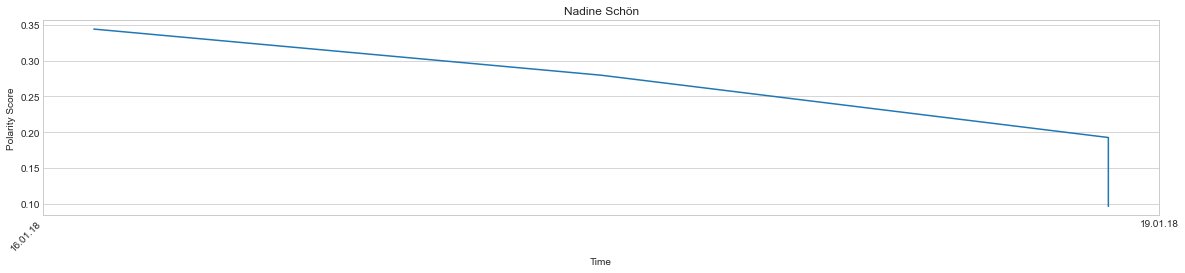

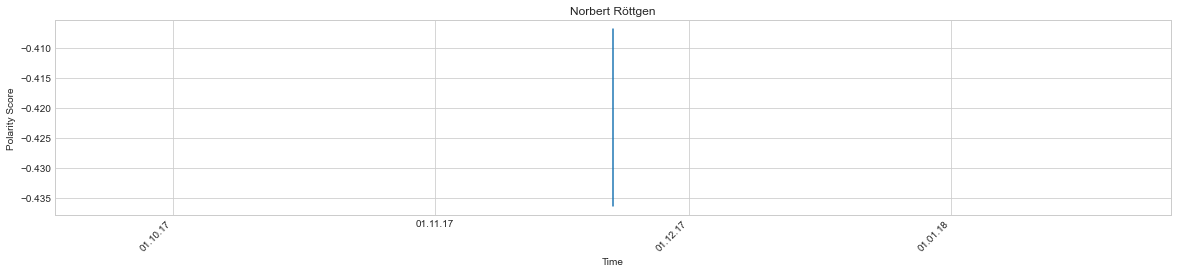

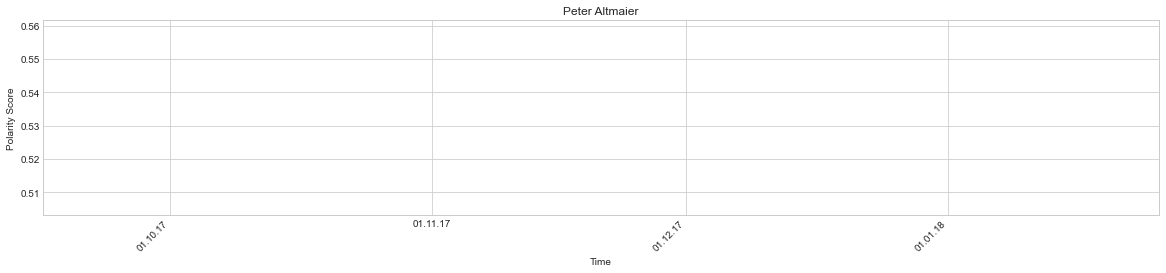

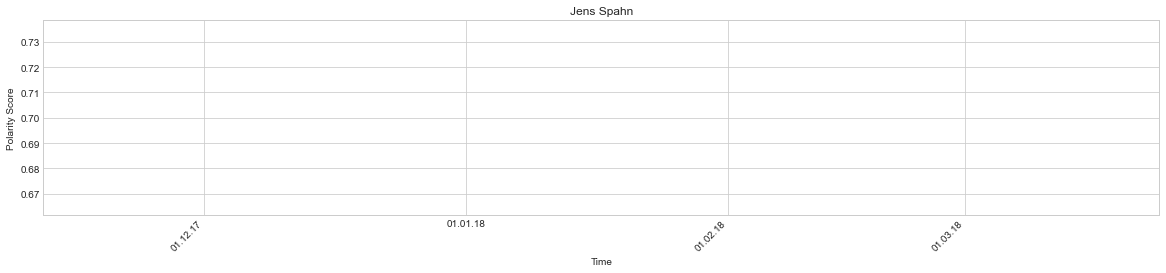

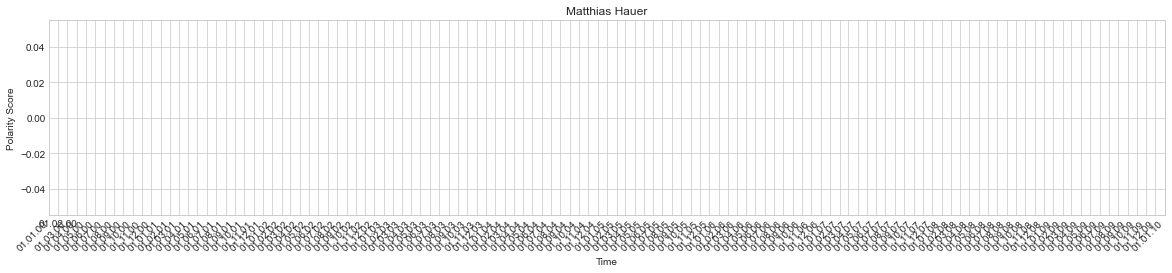

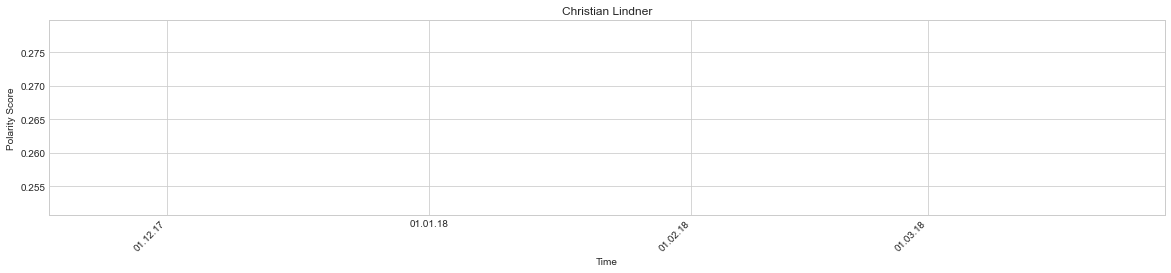

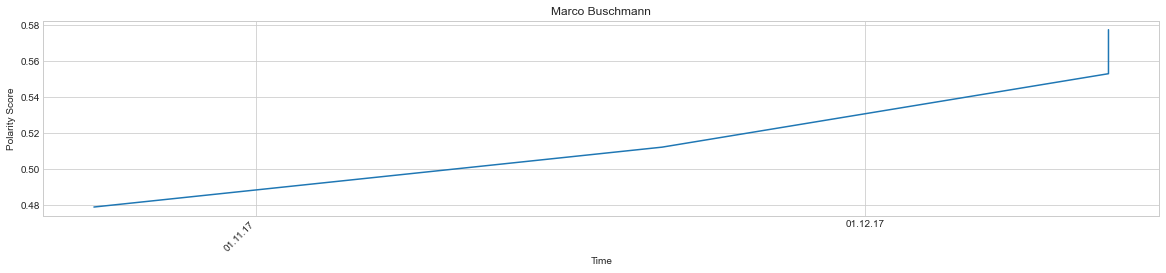

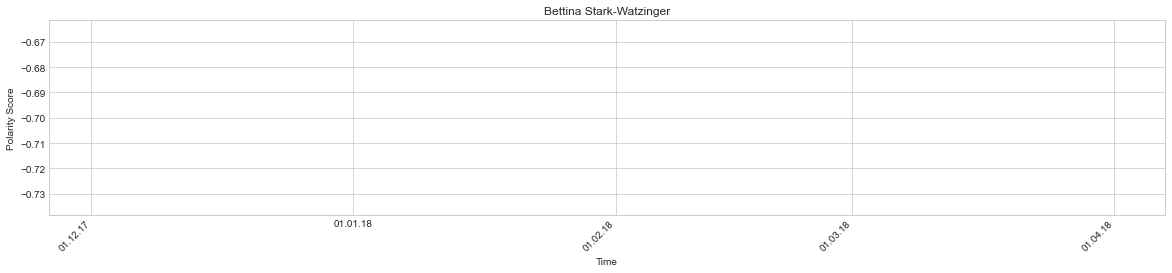

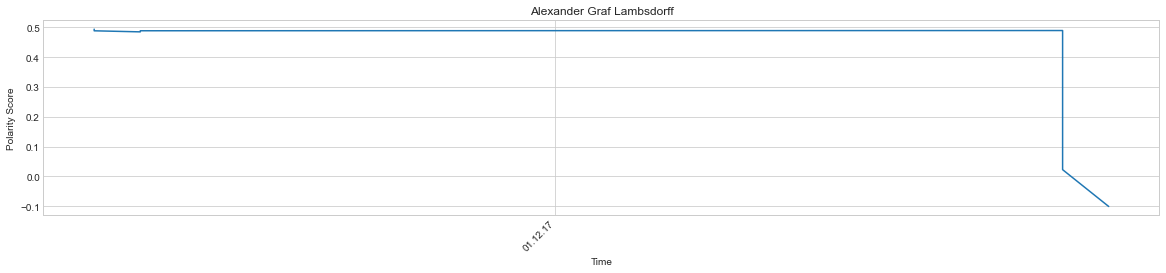

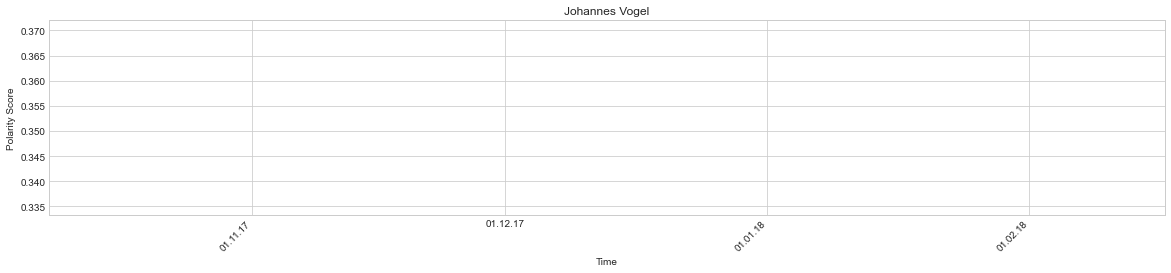

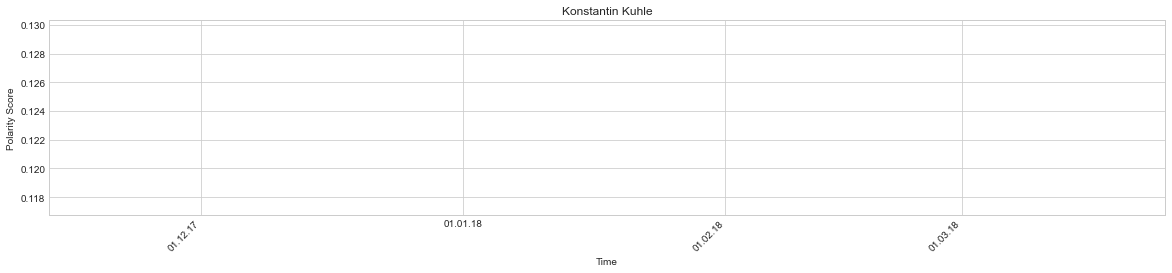

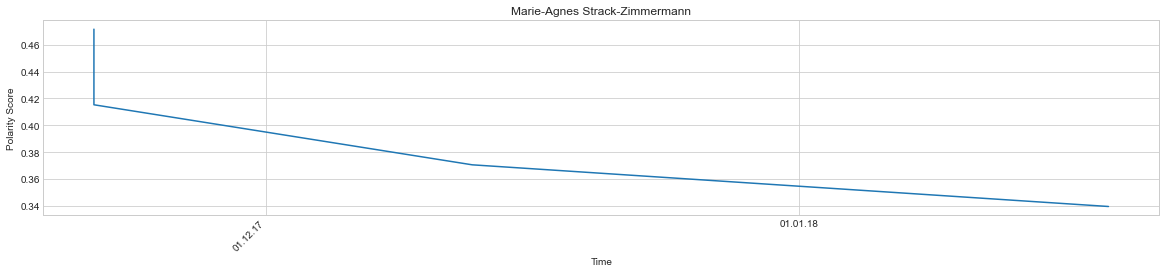

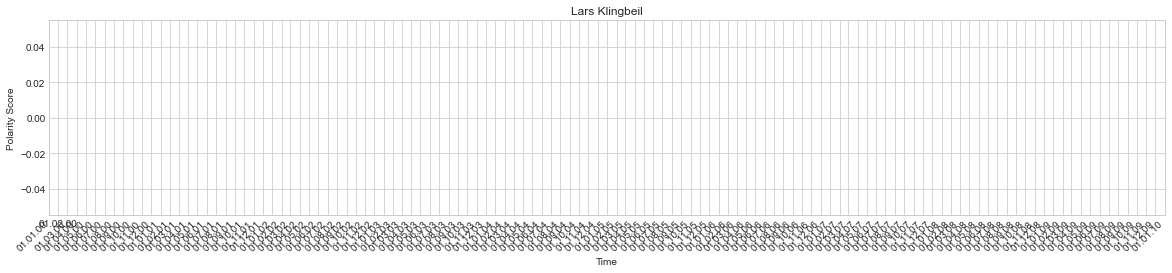

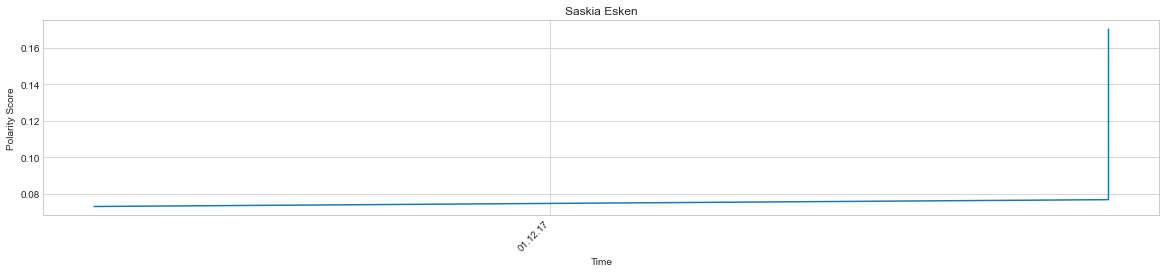

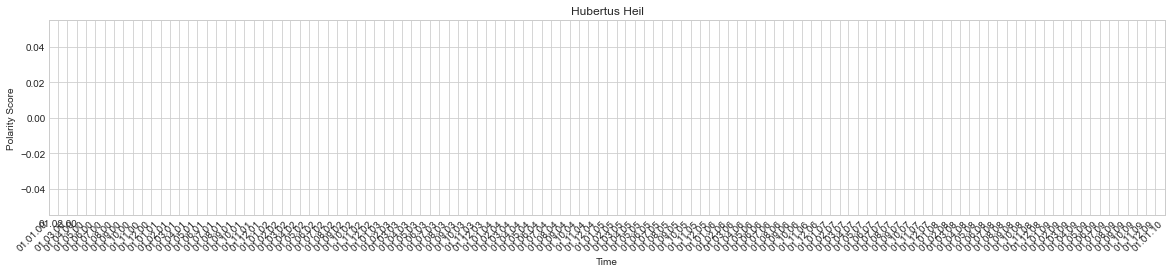

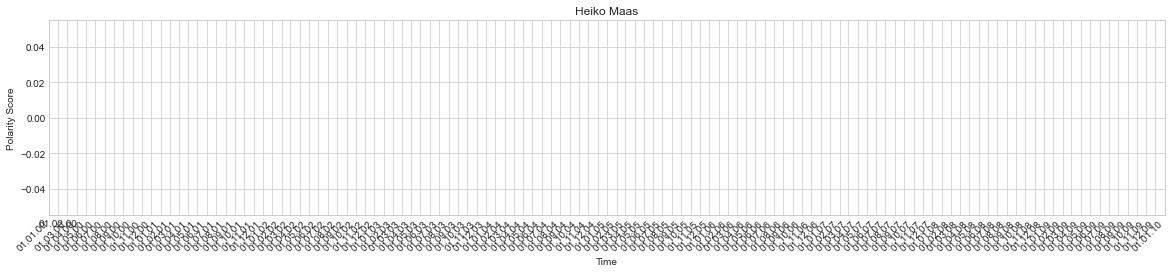

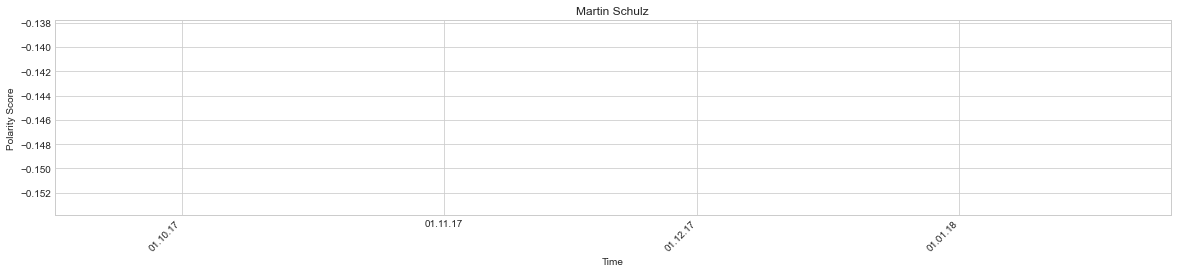

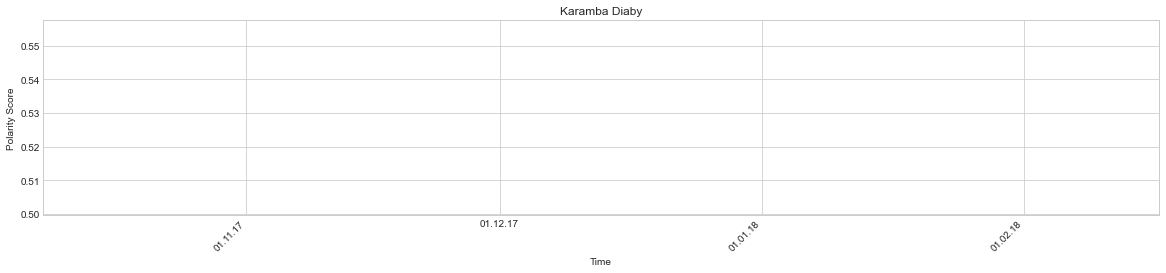

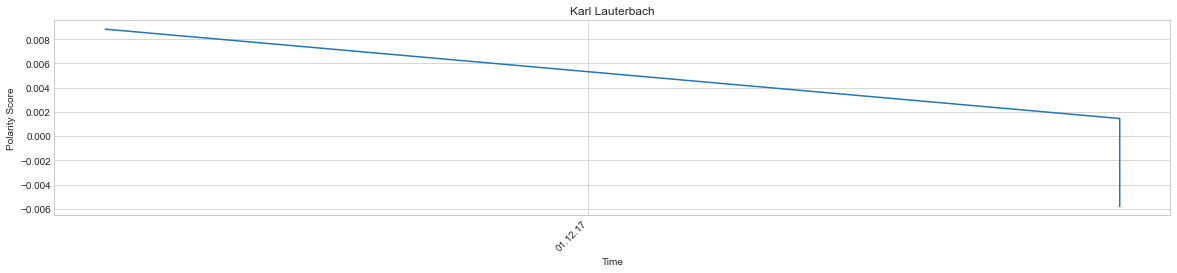

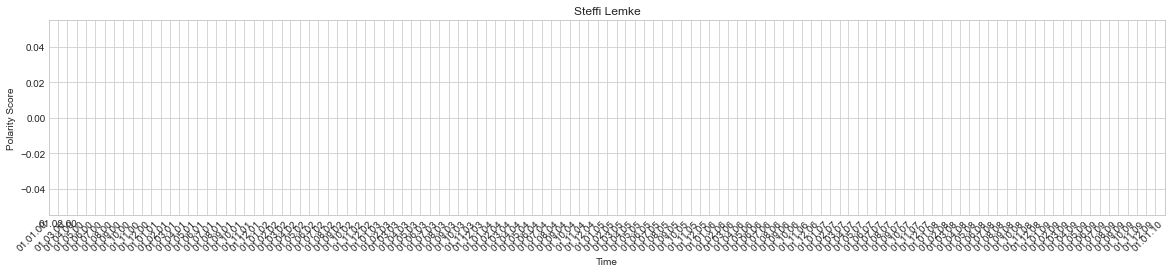

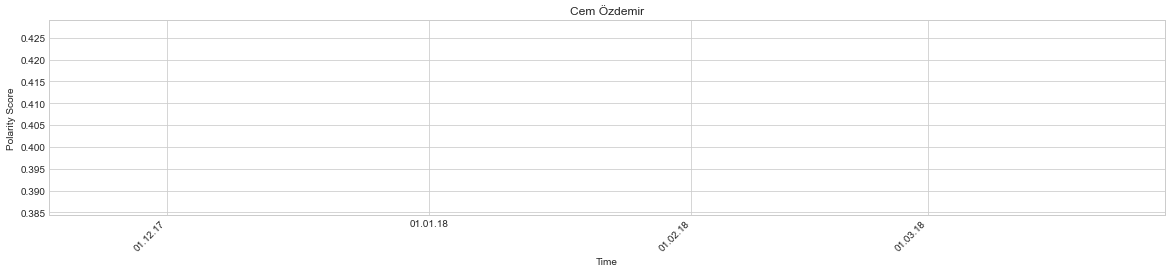

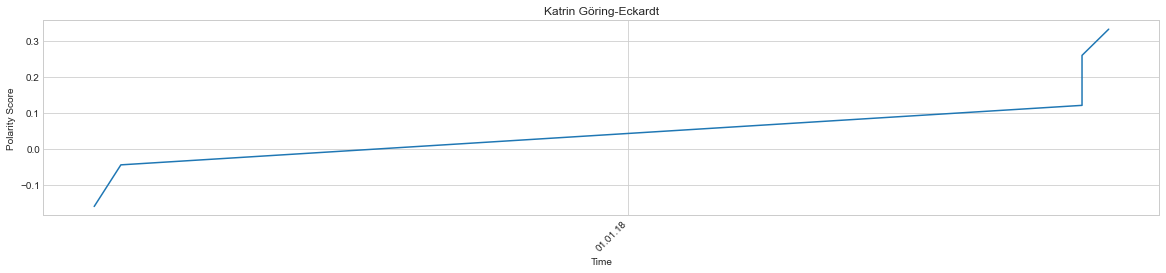

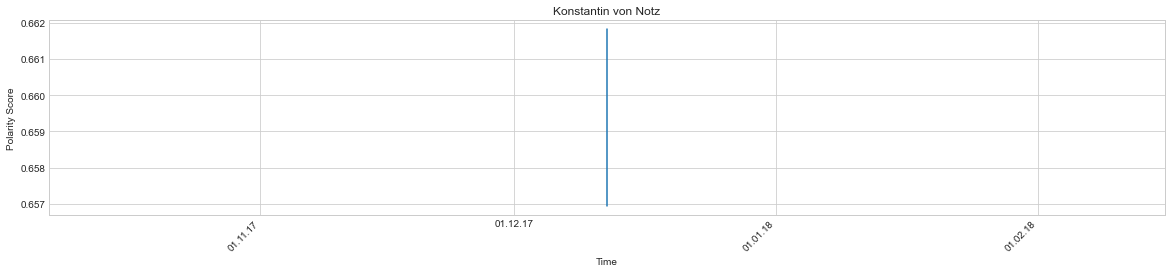

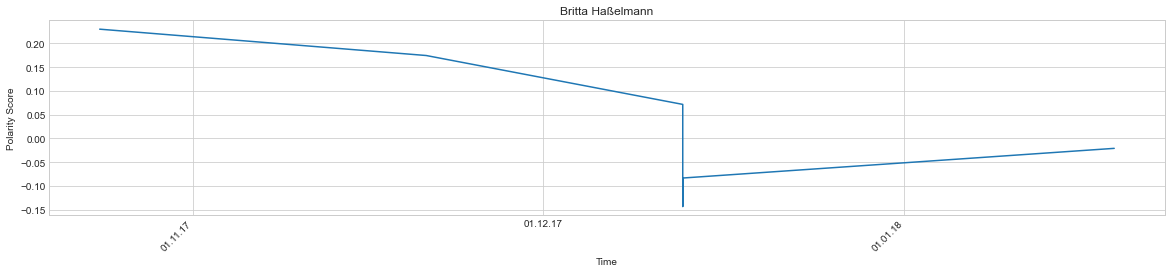

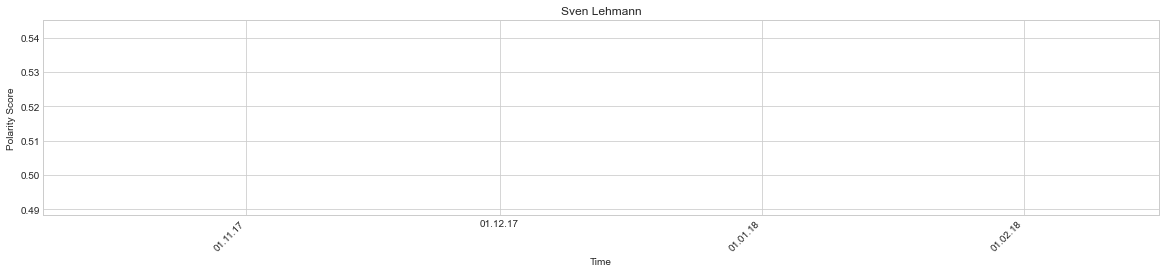

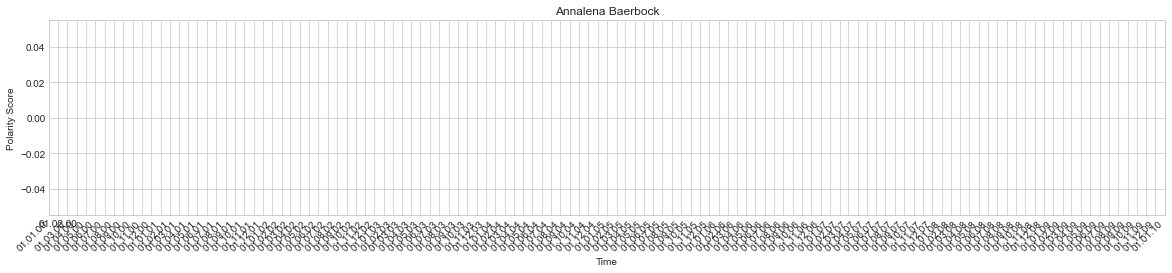

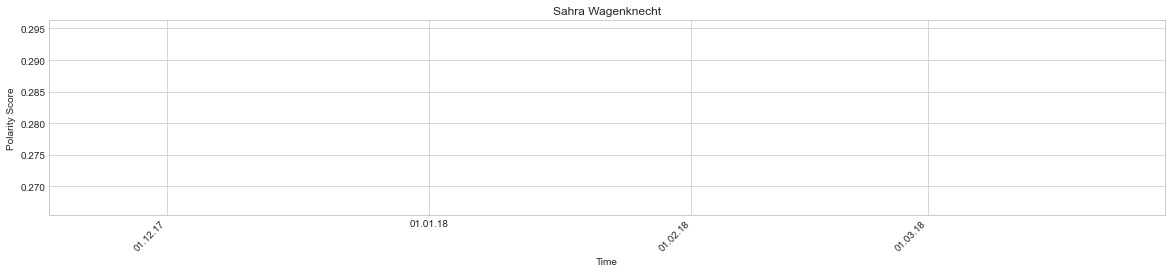

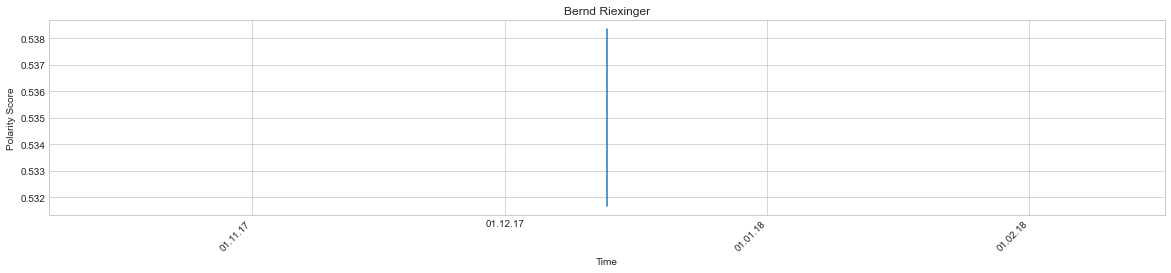

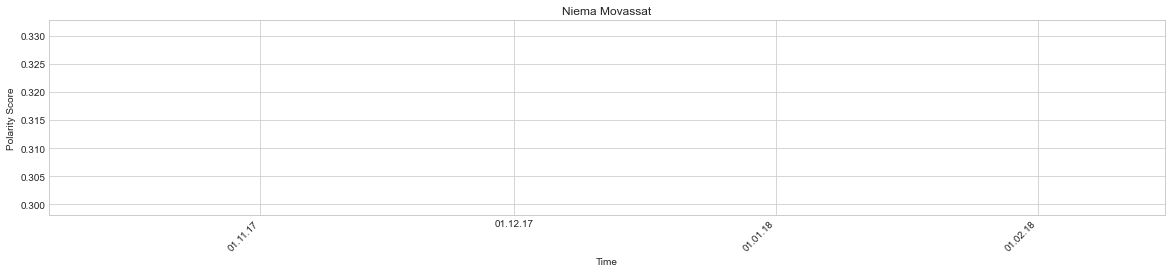

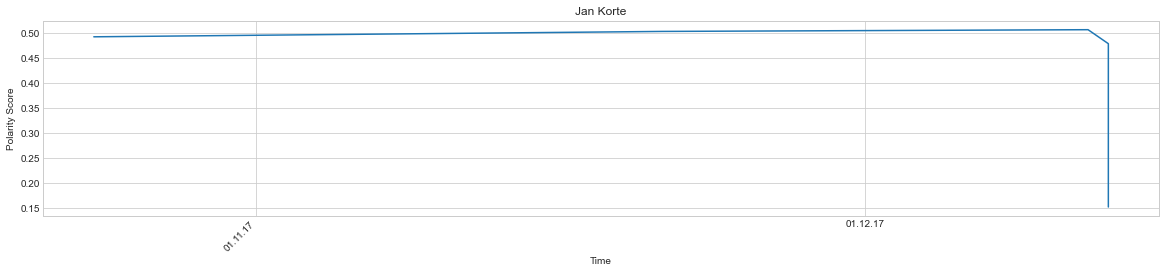

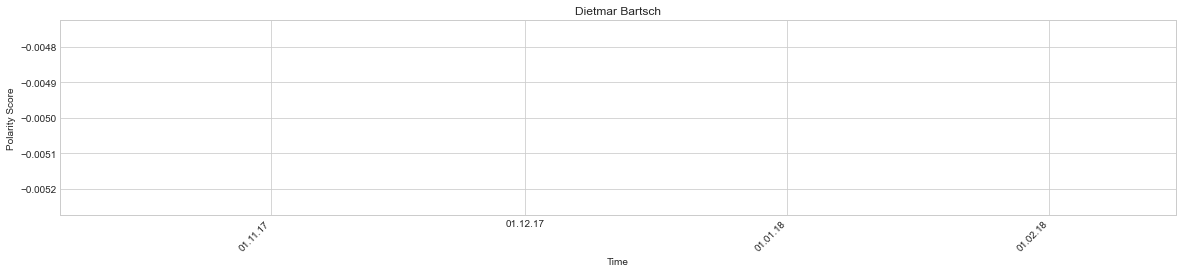

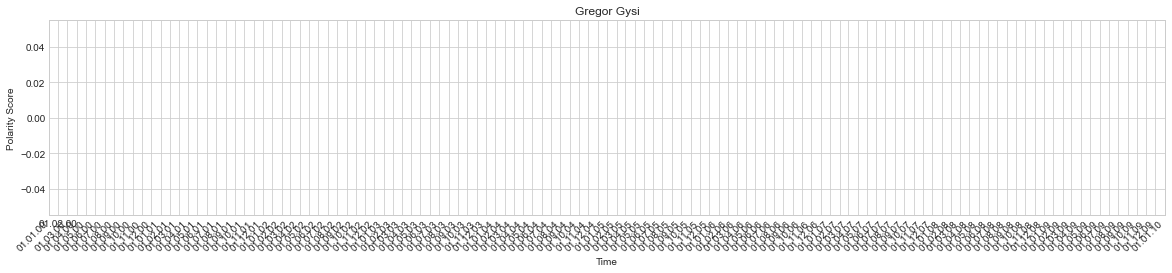

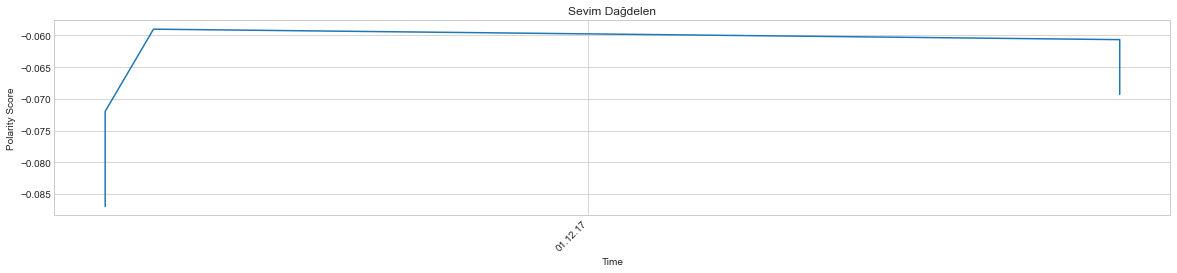

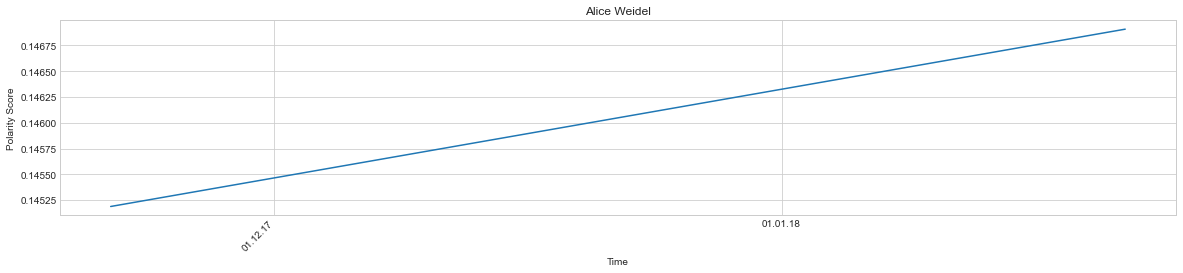

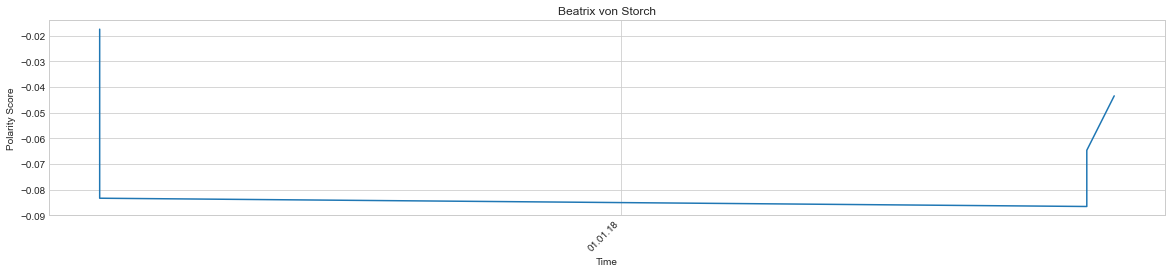

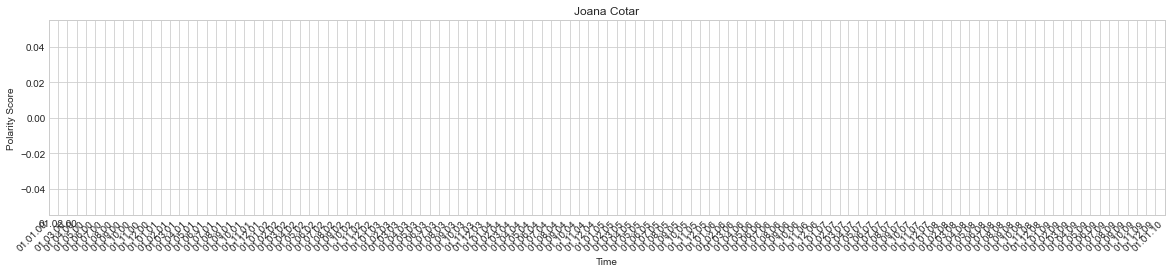

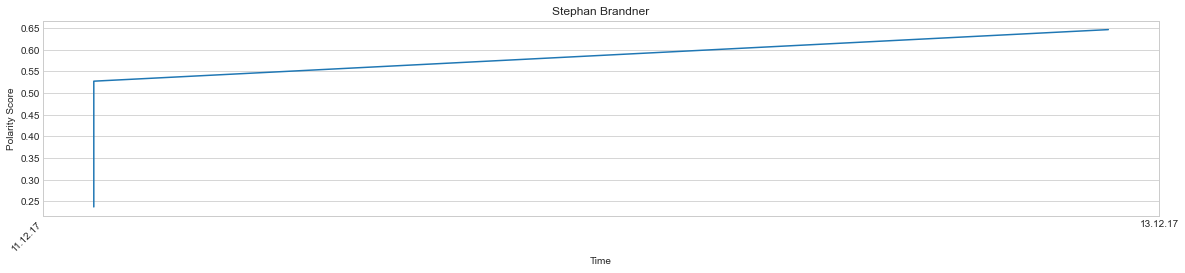

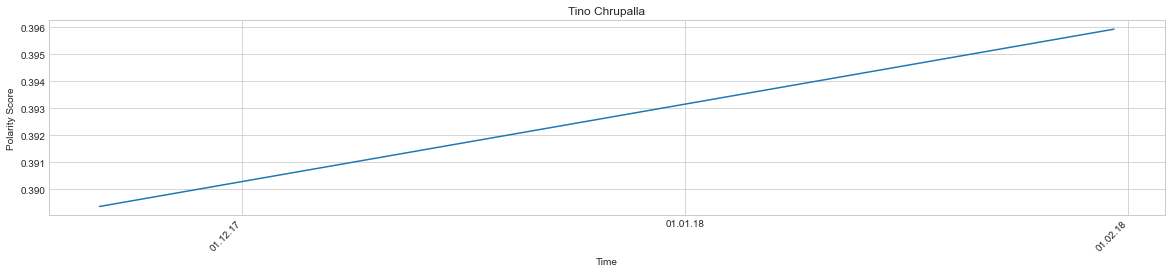

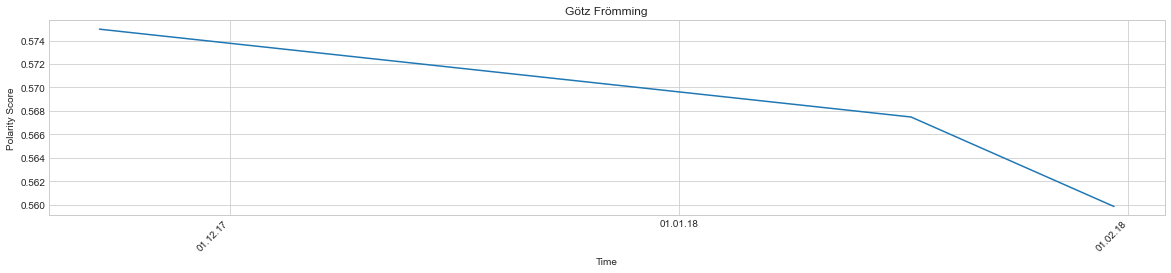

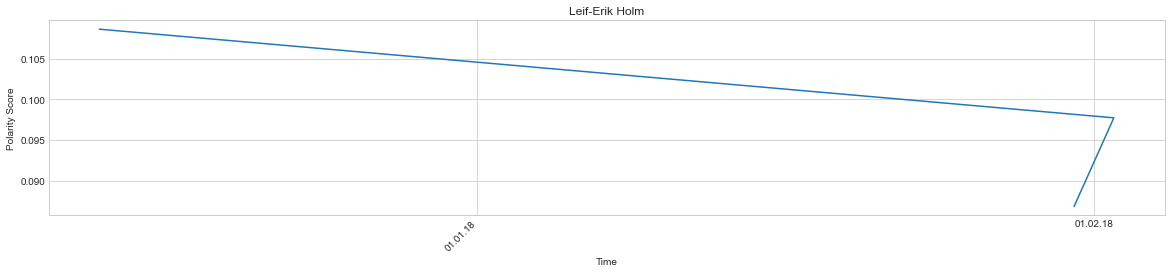

In [12]:
#plot the polarity of speeches over time
i=1
for name in tqdm(['Ralph Brinkhaus','Hermann Gröhe', 'Nadine Schön' ,'Norbert Röttgen' , 'Peter Altmaier' , 'Jens Spahn' , 'Matthias Hauer',
            'Christian Lindner' , 'Marco Buschmann' , 'Bettina Stark-Watzinger', 'Alexander Graf Lambsdorff' , 'Johannes Vogel' , 'Konstantin Kuhle' , 'Marie-Agnes Strack-Zimmermann',
            'Lars Klingbeil' , 'Saskia Esken' , 'Hubertus Heil' , 'Heiko Maas' , 'Martin Schulz' , 'Karamba Diaby' , 'Karl Lauterbach',
            'Steffi Lemke' , 'Cem Özdemir' , 'Katrin Göring-Eckardt' , 'Konstantin von Notz' , 'Britta Haßelmann' , 'Sven Lehmann' , 'Annalena Baerbock',
            'Sahra Wagenknecht' , 'Bernd Riexinger' , 'Niema Movassat' , 'Jan Korte' , 'Dietmar Bartsch' , 'Gregor Gysi' , 'Sevim Dağdelen',
            'Alice Weidel' , 'Beatrix von Storch' , 'Joana Cotar' , 'Stephan Brandner' , 'Tino Chrupalla' , 'Götz Frömming' , 'Leif-Erik Holm']):
    #get speeches from the specific politician
    speeches_analyzing =pre_data_speeches.loc[pre_data_speeches['full_name']==name]
    #create sentiment scores
    blobs=speeches_analyzing['text_preprocessed_sentence'].apply(TextBlob)
    sentiment=[]
    for blob in blobs:
        sentiment.append(blob.sentiment)
    #get the scores
    polarity=[]
    for egg in sentiment:
        polarity.append(egg.polarity)
    #get the desired dates and convert timestamp
    speeches_analyzing['polarity']=polarity
    speeches_analyzing['date']=pd.to_datetime(speeches_analyzing['date'])

    dates=speeches_analyzing['date']
    values=speeches_analyzing['polarity']

    #smooth the curve, higher sigma means more smoothing
    if len(polarity)>18999:
        s=100
    elif len(polarity)>17999:
        s=95
    elif len(polarity)>16999:
        s=90
    elif len(polarity)>15999:
        s=85
    elif len(polarity)>14999:
        s=80
    elif len(polarity)>13999:
        s=75
    elif len(polarity)>12999:
        s=70
    elif len(polarity)>11999:
        s=65
    elif len(polarity)>10999:
        s=60
    elif len(polarity)>9999:
        s=55
    elif len(polarity)>8999:
        s=50
    elif len(polarity)>7999:
        s=45
    elif len(polarity)>6999:
        s=40
    elif len(polarity)>5999:
        s=35
    elif len(polarity)>4999:
        s=30
    elif len(polarity)>3999:
        s=25
    elif len(polarity)>2999:
        s=20
    elif len(polarity)>1999:
        s=15
    elif len(polarity)>1399:
        s=10
    else:
        s=2
    ysmoothed = gaussian_filter1d(values, sigma=s)

    fig = plt.figure(figsize=(20,200))
    ax = fig.add_subplot(42,1,i)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))    
    fig.autofmt_xdate(rotation=45)
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Polarity Score')
    plt.plot(dates, ysmoothed)
    plt.show()
    i +=1